# What is Naive Bayes?

Naive Bayes is among one of the most simple and powerful algorithms for classification based on Bayes’ Theorem with an assumption of independence among predictors. Naive Bayes model is easy to build and particularly useful for very large data sets. There are two parts to this algorithm:

* Naive
* Bayes

The Naive Bayes classifier assumes that the presence of a feature in a class is unrelated to any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that a particular fruit is an apple or an orange or a banana and that is why it is known as “Naive”.

# What is Bayes Theorem?

In Statistics and probability theory, Bayes’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It serves as a way to figure out conditional probability.

Given a Hypothesis H and evidence E, Bayes’ Theorem states that the relationship between the probability of Hypothesis before getting the evidence P(H) and the probability of the hypothesis after getting the evidence P(H|E) is :
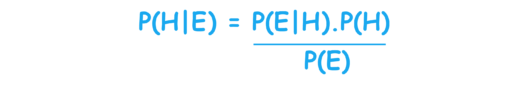

This relates the probability of the hypothesis before getting the evidence P(H), to the probability of the hypothesis after getting the evidence, P(H|E). For this reason, is called the prior probability, while P(H|E) is called the posterior probability. The factor that relates the two, P(H|E) / P(E), is called the likelihood ratio. Using these terms, Bayes’ theorem can be rephrased as:
“The posterior probability equals the prior probability times the likelihood ratio.”

# Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Wine Dataset

In [2]:
data = load_wine()
X = data.data  # Features
y = data.target  # Target classes

# Display dataset information

In [3]:
print("Feature Names:", data.feature_names)
print("Target Classes:", data.target_names)
print("Dataset Shape:", X.shape)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']
Dataset Shape: (178, 13)


# Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

# Feature Scaling to bring the variable in a single scale

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Hyperparameter Optimization using GridSearchCV

In [6]:
param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters:", best_params)


Best Hyperparameters: {'var_smoothing': np.float64(1e-09)}


# Train Naive Bayes Classifier with Best Parameters

In [7]:
nvclassifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
nvclassifier.fit(X_train, y_train)

GaussianNB(var_smoothing=np.float64(1e-09))

# Predicting the Test set results

In [8]:
y_pred = nvclassifier.predict(X_test)
print("Predicted Values:", y_pred)

Predicted Values: [0 1 2 0 2 0 2 1 1 2 1 1 0 0 0 1 2 1 0 0 0 1 0 1 0 2 1 0 1 2 2 2 2 1 1 1]


# Comparing actual vs predicted values

In [9]:
y_compare = np.vstack((y_test, y_pred)).T
print("\nActual vs Predicted Values (Top 5):\n", y_compare[:5, :])


Actual vs Predicted Values (Top 5):
 [[0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]]


# Making the Confusion Matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


# Plotting the confusion matrix using seaborn

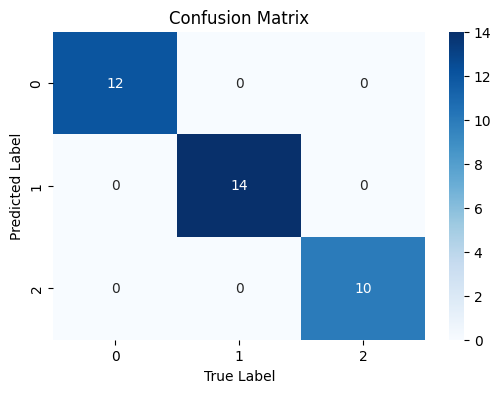

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Percentage data representation in each quadrant

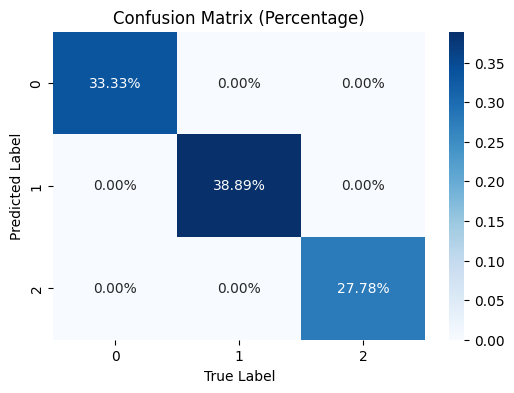

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Classification Report

In [13]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Finding accuracy from the confusion matrix

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy of the Optimized Naive Bayes Classification:', accuracy)


Accuracy of the Optimized Naive Bayes Classification: 1.0
